In [1]:
import numpy as np
import skewnormal as sn
import skewnfit as sf_n
import matplotlib.pyplot as plt
import numpy as np
from CentralStreamingModel.utils.read_probabilities import VD
from scipy.optimize import fsolve

In [2]:
boxsize = 2000
box = 1
snapshot  =20

measured = VD(box, boxsize, snapshot)

In [3]:
vr = measured.v.r
vt = measured.v.t

v = np.array(np.meshgrid(vr, vt)).T.reshape(-1,2)

true_alpha = -0.7
true_w_r = 10.
true_w_t = 20.
true_vrc = 2
pdf_n = sn.skewnormal(v, true_w_r,true_w_t,true_vrc,true_alpha).reshape(vr.shape[0],
                                           vt.shape[0])


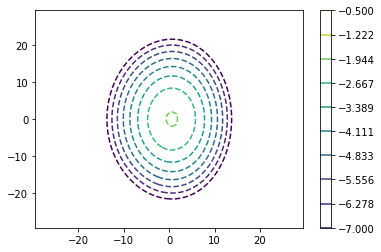

In [4]:
levels = np.linspace(-7., -0.5, 10)

plt.contour(vt, vr, np.log10(pdf_n), levels = levels,
           linestyles='dashed')

plt.colorbar()

In [5]:
w_vt = np.abs(vt[1] - vt[0])
marginal_r = w_vt * np.sum(pdf_n, axis = 0)
w_vr = np.abs(vr[1] - vr[0])

marginal_t = w_vr * np.sum(pdf_n, axis = -1)

In [6]:

def get_alpha(skewness):
    func = lambda delta : skewness - (4. - np.pi)/2 *(delta * np.sqrt(2/np.pi))**3 / (1 - 2*delta**2/np.pi)**(3/2)
    
    delta_initial_guess = 0.7
    delta_solution = fsolve(func, delta_initial_guess)
    alpha = delta_solution / np.sqrt(1-delta_solution**2)
    
    return delta_solution, alpha

def get_w(sigma, delta):

    return sigma/np.sqrt(1 - 2*delta**2/np.pi)

def get_vc(mean, w, delta):
    
    return mean - w * delta *np.sqrt(2./np.pi)
    

In [7]:
measured_mean = np.sum(marginal_r * vr)
measured_std_r = np.sqrt(np.sum(marginal_r * (vr - measured_mean )**2))
measured_skewness = (np.sum(marginal_r * (vr - measured_mean )**3))/measured_std_r**3
measured_std_t = np.sqrt(np.sum(marginal_t * (vt)**2))

In [8]:
estimated_delta, estimated_alpha = get_alpha(measured_skewness)

In [9]:
print(estimated_alpha)
print(true_alpha)

[-0.7]
-0.7


In [10]:
estimated_w_r = get_w(measured_std_r, estimated_delta)

In [11]:
print(estimated_w_r**2)
print(true_w_r)

[10.]
10.0


In [12]:
estimated_w_t = get_w(measured_std_t, 0.)

In [13]:
print(estimated_w_t**2)
print(true_w_t)

19.9999999830311
20.0


In [14]:
estimated_vrc = get_vc(measured_mean, estimated_w_r, estimated_delta)

In [15]:
print(estimated_vrc)
print(true_vrc)

[2.]
2


## Test with actual distribution

In [16]:
rbin = 15

estimated_delta, estimated_alpha = get_alpha(measured.skewness.r[rbin])
print(estimated_delta)
estimated_delta = estimated_delta[0]
estimated_alpha = estimated_alpha[0]
estimated_w_r = get_w(measured.std.r[rbin], estimated_delta)
estimated_w_t = get_w(measured.std.t[rbin], 0.)
estimated_vrc = get_vc(measured.mean.r[rbin], estimated_w_r, estimated_delta)

estimated_w_r = estimated_w_r**2
estimated_w_t = estimated_w_t**2

[-0.96818669]


/home/c-cuesta/.conda/envs/carol/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
pdf_n = sn.skewnormal(v, estimated_w_r,estimated_w_t,estimated_vrc,estimated_alpha).reshape(vr.shape[0],
                                           vt.shape[0])


/home/c-cuesta/.conda/envs/carol/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


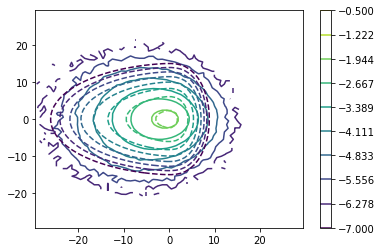

In [18]:
levels = np.linspace(-7., -0.5, 10)

plt.contour(vt, vr, np.log10(measured.jointpdf[rbin]), levels = levels)
plt.contour(vt, vr, np.log10(pdf_n), levels = levels,
           linestyles='dashed')



plt.colorbar()

In [19]:
def get_skewness(delta):
    return (4 - np.pi)/2. * (delta*np.sqrt(2./np.pi))**3 / (1 - 2*delta**2/np.pi)**(3./2.)

def get_sigma(w, delta):
    return np.sqrt(w * (1 - 2 *delta**2/np.pi))

def get_mean(vrc, w, delta):
    return vrc + np.sqrt(w) * delta * np.sqrt(2./np.pi)

In [20]:
get_skewness(estimated_delta)

-0.7727027961972824

In [21]:
measured.skewness.r[rbin]

-0.772702796197283

In [22]:
get_sigma(estimated_w_r, estimated_delta)

3.691845793901076

In [23]:
measured.std.r[rbin]

3.691845793901076

In [24]:
get_mean(estimated_vrc, estimated_w_r, estimated_delta)

-2.0218010516814124

In [25]:
measured.mean.r[rbin]

-2.0218010516814124

In [35]:
import importlib
importlib.reload(sn)

<module 'skewnormal' from '/home/c-cuesta/CentralStreamingModel/biskewn/skewnormal.py'>

In [36]:
test = sn.skewnormal_given_moments(v, measured.mean.r[rbin],
            measured.std.r[rbin], measured.std.t[rbin], 
            measured.skewness.r[rbin])

In [37]:
test = test.reshape(vr.shape[0],
                                           vt.shape[0])


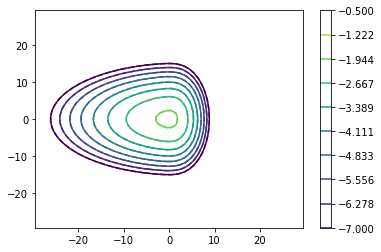

In [38]:
levels = np.linspace(-7., -0.5, 10)

plt.contour(vt, vr, np.log10(test), levels = levels)
plt.contour(vt, vr, np.log10(pdf_n), levels = levels,
           linestyles='dashed')



plt.colorbar()